# Central Limit Theorem

中心极限定理： 对任意分布进行抽样后，再对每个样本求均值（每组30个样本以上即可），这些均值符合正态分布。

In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 

## Generate the overall random data

In [24]:
import numpy as np 
data_size = 10000
random_data = np.random.randint(1, 7, data_size)
print 'Mean: ', random_data.mean() # 打印平均值
print 'Standard: ', random_data.std()  # 打印标准差

Mean:  3.4663
Standard:  1.7186809797050762


In [25]:
print len(random_data)

10000


In [26]:
import matplotlib.pyplot as plt

(array([1760.,    0., 1675.,    0., 1643.,    0., 1620.,    0., 1668.,
        1634.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

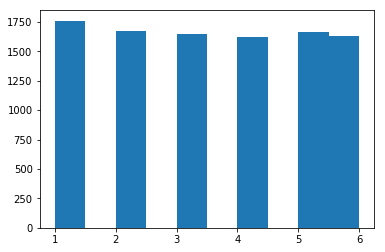

In [27]:
random_data = np.array(random_data)
plt.hist(random_data)

## A small sample test

In [28]:
sample1 = []
for i in range(0, 10):
    sample1.append(random_data[int(np.random.random() * len(random_data))])

print sample1 # 打印出来

[4, 4, 3, 2, 2, 1, 6, 2, 4, 1]


In [29]:
print 'Mean: ', np.array(sample1).mean() # 打印平均值
print 'Standard: ', np.array(sample1).std()  # 打印标准差

Mean:  2.9
Standard:  1.5132745950421556


可以看到，我们只抽10个的时候，样本的平均值（4.0）会距离总体的平均值（3.5）有所偏差。
有时候我们运气不好，抽出来的数字可能偏差很大，比如抽出来10个数字都是6。那平均值就是6了。 为什么会出现都是6的情况呢？因为我比较6…哦不是，因为这就是随机的魅力呀！

## More sample sets and test

In [30]:
samples = []
samples_mean = []
samples_std = []

for i in range(0, 1000): # sample 1000 times, each sample has 50 data points, so it's 10% of the original data set
    sample = []
    for j in range(0, 50):
        sample.append(random_data[int(np.random.random() * len(random_data))])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)

samples_mean_np = np.array(samples_mean)
samples_std_np = np.array(samples_std)

# print samples_mean_np
# print samples_std_np

(array([  3.,  18.,  53., 140., 196., 253., 185., 112.,  32.,   8.]),
 array([2.62 , 2.778, 2.936, 3.094, 3.252, 3.41 , 3.568, 3.726, 3.884,
        4.042, 4.2  ]),
 <a list of 10 Patch objects>)

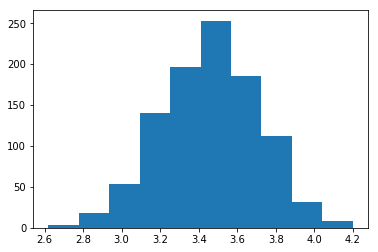

In [31]:
plt.hist(samples_mean_np)

## Let try this on poisson data set

In [32]:
possion_data = np.random.poisson(lam=1.0, size=data_size)

In [33]:
print possion_data

[1 3 3 ... 1 1 2]


In [34]:
print 'Mean: ', possion_data.mean()
print 'Std: ', possion_data.std()

Mean:  1.0163
Std:  1.0077868375802495


(array([3613., 3696.,    0., 1854.,    0.,  635.,  162.,    0.,   34.,
           6.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

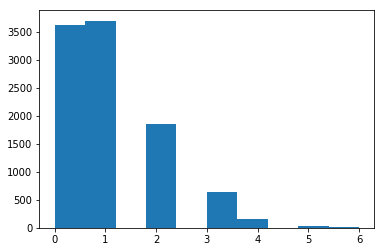

In [35]:
plt.hist(possion_data)

### Let's try a small sample

In [36]:
p_sample_1 = []

for i in range(0, 10):
    p_sample_1.append(possion_data[int(np.random.random() * data_size)])

    
print p_sample_1 # 打印出来

[1, 1, 1, 0, 2, 1, 3, 0, 1, 0]


In [37]:
print 'Mean: ', np.array(p_sample_1).mean()
print 'Std: ', np.array(p_sample_1).std()

Mean:  1.0
Std:  0.8944271909999159


In [38]:
p_samples = []
p_samples_mean = []
p_samples_std = []

for i in range(0, 1000):
    sample = []
    for j in range(0, 50):
        sample.append(possion_data[int(np.random.random() * data_size)])
    p_sample_np = np.array(sample)
    p_samples_mean.append(p_sample_np.mean())
    p_samples_std.append(p_sample_np.std())
    p_samples.append(p_sample_np)

p_samples_mean_np = np.array(p_samples_mean)
p_samples_std_np = np.array(p_samples_std)

# print p_samples_mean_np;
# print p_samples_std_np;

(array([  7.,  22.,  92., 162., 218., 226., 155.,  67.,  38.,  13.]),
 array([0.63245553, 0.70374622, 0.77503691, 0.84632759, 0.91761828,
        0.98890897, 1.06019966, 1.13149034, 1.20278103, 1.27407172,
        1.3453624 ]),
 <a list of 10 Patch objects>)

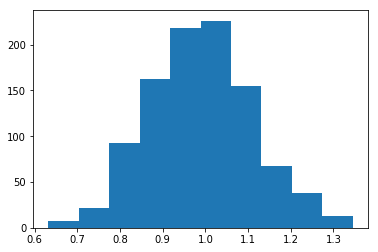

In [39]:
plt.hist(p_samples_std_np)

中心极限定理 不限制初始采样的分布特性